In [ ]:
import numpy as np
import pandas as pd

In [4]:
all_matches = pd.read_csv(r'all_matches.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
all_matches.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200173,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.2,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200174,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.3,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200175,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.4,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200176,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.5,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200177,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.6,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Making Some Minor Changes and removing redundancies

In [6]:
all_matches_corrected = all_matches.replace(to_replace='Kings XI Punjab',value='Punjab Kings')
all_matches_corrected.replace(to_replace='Feroz Shah Kotla',value='Arun Jaitley Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Arun Jaitley Stadium, Delhi',value='Arun Jaitley Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Sardar Patel Stadium, Motera',value='Narendra Modi Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Wankhede Stadium, Mumbai',value='Wankhede Stadium',inplace=True)
all_matches_corrected.replace(to_replace=['MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk, Chennai']
                              ,value='MA Chidambaram Stadium',inplace=True)
all_matches_corrected.replace(to_replace='M.Chinnaswamy Stadium',value='M Chinnaswamy Stadium',inplace=True)

all_matches_corrected.replace(to_replace='Brabourne Stadium, Mumbai',value='Brabourne Stadium',inplace=True)
all_matches_corrected.replace(to_replace=['Punjab Cricket Association IS Bindra Stadium, Mohali'
                                                        ,'Punjab Cricket Association IS Bindra Stadium']
                                                        ,value='Punjab Cricket Association Stadium, Mohali',inplace=True)

all_matches_corrected.replace(to_replace='Rajiv Gandhi International Stadium, Uppal',value='Rajiv Gandhi International Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Narendra Modi Stadium, Ahmedabad',value='Narendra Modi Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

all_matches_corrected.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200173,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,19.2,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200174,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,19.3,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200175,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,19.4,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200176,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,19.5,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200177,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,19.6,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_matches = all_matches_corrected.copy() #just using the same name again for subsequent code


#matches for season 2017
#all_matches = all_matches[all_matches.season.isin([2017,'2018',2018,2019,'2019','2021/21','2021',2021])]

# Preparing the Statistics of Batsmen and Bowlers from Past Data

In [8]:
def get_batsmen_statistics(matches_df):

    batsmen_df = pd.DataFrame(columns = ['Batsman','Runs','Balls_Faced','Fours','Sixes','Strike_Rate'])
    strikers = matches_df.striker.unique()
    for striker in strikers:    
        batsman_ball2ball = matches_df[matches_df.striker==striker].runs_off_bat
        runs = batsman_ball2ball.sum()
        fours = int(batsman_ball2ball[batsman_ball2ball==4].count())
        sixes = int(batsman_ball2ball[batsman_ball2ball==6].count())
        balls = int(batsman_ball2ball.shape[0])
        strike_rate = round(runs/balls*100,2)
        batsmen_df=batsmen_df.append({'Batsman':striker,
                                      'Runs':runs,
                                      'Balls_Faced':balls,
                                      'Fours':fours,
                                      'Sixes':sixes,
                                      'Strike_Rate':strike_rate},ignore_index=True)
    
    return batsmen_df

def get_bowlers_statistics(matches_df):
    
    matches_df = matches_df.iloc[:]
    matches_df.fillna(0,inplace=True)
    bowlers_df = pd.DataFrame(columns = ['Bowler','Runs_Conceded','Balls','Economy_Rate'])
    bowlers = matches_df.bowler.unique()
    matches_df['total_runs'] = matches_df['runs_off_bat']+matches_df['wides']+matches_df['noballs']
    
    for bowler in bowlers:
        bowler_ball2ball = matches_df[matches_df.bowler==bowler]
        runs_conceded = bowler_ball2ball.total_runs.sum()

        #calculates the total number of wide balls and noballs
        wide_balls = bowler_ball2ball[bowler_ball2ball.wides !=0].shape[0]
        noballs = bowler_ball2ball[bowler_ball2ball.noballs !=0].shape[0]
        extra_balls = wide_balls+noballs
        
        #calculates the total number of overs
        balls = bowler_ball2ball.shape[0]
        overs = (balls-extra_balls)/6
        
        #economy rate
        economy_rate = round(runs_conceded/overs,2)
        
        bowlers_df = bowlers_df.append({'Bowler':bowler,'Economy_Rate':economy_rate,
                                        'Runs_Conceded':runs_conceded,'Balls':balls-extra_balls},ignore_index = True)
        
    return bowlers_df

In [9]:
all_matches.fillna(0,inplace=True)

#PP stands for Powerplay
all_matches_PP = all_matches[all_matches.ball<5.99]

In [10]:
batsmen_database_PP = get_batsmen_statistics(all_matches_PP)
batsmen_database_PP

,Batsman,Runs,Balls_Faced,Fours,Sixes,Strike_Rate
0,SC Ganguly,529,540,76,9,97.96
1,BB McCullum,1557,1278,184,70,121.83
2,RT Ponting,45,75,2,1,60.00
3,R Dravid,905,855,148,7,105.85
4,W Jaffer,77,95,9,1,81.05
...,...,...,...,...,...,...
288,RM Patidar,20,25,2,0,80.00
289,Shahbaz Ahmed,14,9,0,1,155.56
290,S Dube,12,16,1,1,75.00
291,M Shahrukh Khan,0,2,0,0,0.00


In [11]:
bowlers_database_PP = get_bowlers_statistics(all_matches_PP)
bowlers_database_PP

,Bowler,Runs_Conceded,Balls,Economy_Rate
0,P Kumar,1754.0,1572,6.69
1,Z Khan,1452.0,1292,6.74
2,AA Noffke,22.0,6,22.00
3,AB Dinda,991.0,810,7.34
4,I Sharma,1483.0,1251,7.11
...,...,...,...,...
348,RP Meredith,48.0,30,9.60
349,Abhishek Sharma,22.0,18,7.33
350,LI Meriwala,28.0,12,14.00
351,Jalaj S Saxena,10.0,6,10.00


In [16]:
#Running the followling lines of code with save the statistics as csv files

batsmen_database_PP.to_csv('batsmen_database_PP.csv')
bowlers_database_PP.to_csv('bowlers_database_PP.csv')

# Data Preprocessing

In [17]:
data_df = all_matches.copy()

#filling nan with 0
data_df.fillna(0,inplace=True)

#considering only the powerplay
data_df = data_df[data_df.ball<5.99]

#eliminating super overs
data_df = data_df[data_df.innings<=2] 

#dropping useless columns
data_df.drop(['non_striker','wides','noballs','byes','legbyes',
              'penalty','other_wicket_type','other_player_dismissed'],axis=1,inplace=True)

#adding total runs column
data_df['total_runs']= data_df['runs_off_bat']+data_df['extras']



In [18]:
data_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,total_runs
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,0,1,0,0,1
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0,0,0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,1,0,0,1
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0,0,0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200083,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,5.2,Mumbai Indians,Chennai Super Kings,RG Sharma,L Ngidi,1,0,0,0,1
200084,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,5.3,Mumbai Indians,Chennai Super Kings,Q de Kock,L Ngidi,1,0,0,0,1
200085,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,5.4,Mumbai Indians,Chennai Super Kings,RG Sharma,L Ngidi,1,0,0,0,1
200086,1254084,2021,2021-05-01,Arun Jaitley Stadium,2,5.5,Mumbai Indians,Chennai Super Kings,Q de Kock,L Ngidi,4,0,0,0,4


In [19]:
data_df_processed = pd.DataFrame(columns = ['match_id','season','venue','date','D/N','innings','batting_team','bowling_team','batsmen','bowlers',
                                   'avg_strike_rate','avg_economy_rate','wickets','runs'])

In [20]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs


In [21]:
#returns the avg economy rate of the list of bowlers passed as an argument

def get_avg_economy_rate(bowlers):
    
    if len(bowlers)==0:
        return 7.0
    
    economy_t = 0
    for bowler in bowlers:
        if bowler in bowlers_database_PP.Bowler.values:
            index_of_bowler = bowlers_database_PP[bowlers_database_PP.Bowler==bowler].index.values
            economy = float(bowlers_database_PP.Economy_Rate.iloc[index_of_bowler])
        else:
            economy = 7.0
           
        economy_t += economy
    return round(economy_t/len(bowlers),2)

#***************************************************
#function returns the average strike rate of the list of batsmen passed as an argument

def get_avg_strike_rate(batsmen):
    
    if len(batsmen)==0:
        return 100
    strike_rate_t=0  #stores the total strike rate
    for batsman in batsmen:
        if batsman in batsmen_database_PP.Batsman.values:
            index_of_batsman = batsmen_database_PP[batsmen_database_PP.Batsman==batsman].index.values
            strike_rate = float(batsmen_database_PP.Strike_Rate.iloc[index_of_batsman])
            
        else:    #if the batsman is new, then assuming his strikerate is 100
            strike_rate = 100
        
        strike_rate_t += strike_rate
            
    return round(strike_rate_t/len(batsmen),2)

In [22]:
match_ids = data_df.match_id.unique()

for match_id in match_ids:
    
    match_df = data_df[data_df.match_id==match_id]
    match_deets = match_df.iloc[0]
    season = match_deets.season
    venue = match_deets.venue
    batting_team = match_deets.batting_team
    bowling_team = match_deets.bowling_team
    date = match_deets.start_date
    
    for i in [1,2]:
        
        if i==2:
            (batting_team,bowling_team) = (bowling_team,batting_team)
        
        innings_df = match_df[match_df.innings==i]
        runs = innings_df.total_runs.sum()
        #calculating the number of wickets
        wicket_balls = innings_df[innings_df.player_dismissed != 0]
        wickets = wicket_balls.shape[0]

        batsmen = innings_df.striker.unique()
        bowlers = innings_df.bowler.unique()

        avg_strike_rate = get_avg_strike_rate(batsmen)
        avg_economy_rate = get_avg_economy_rate(bowlers)

        row_dict = {'match_id':match_id,'season':season,'venue':venue,'date':date,
                    'innings':i,'batting_team':batting_team,
                    'bowling_team':bowling_team,'batsmen':batsmen,'bowlers':bowlers,
                    'avg_strike_rate':avg_strike_rate,'avg_economy_rate':avg_economy_rate,
                    'wickets':wickets,'runs':runs}

        
        data_df_processed=data_df_processed.append(row_dict,ignore_index=True)

In [23]:
#Adding if a match is 4pm or 8pm match

test = data_df_processed.copy()
dates = test.date.unique()
for date in dates:
    matches_on_date = test[test.date==date]
    num = len(matches_on_date)
    indices_of_matches= matches_on_date.index.values
    
    if num==2:
        test.loc[indices_of_matches,'D/N'] = 8
    
    elif num==4:
        test.loc[indices_of_matches[:2],'D/N']= 4
        test.loc[indices_of_matches[2:4],'D/N']= 8
    
data_df_processed = test.copy()

In [24]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs
0,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]",93.26,11.81,1,61
1,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar]",96.88,7.98,4,26
2,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,1,Chennai Super Kings,Punjab Kings,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]",115.25,7.64,1,53
3,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,2,Punjab Kings,Chennai Super Kings,"[K Goel, JR Hopes]","[JDP Oram, MS Gony]",108.70,9.14,1,63
4,335984,2007/08,Arun Jaitley Stadium,2008-04-19,8.0,1,Rajasthan Royals,Delhi Daredevils,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]",90.31,8.54,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1254082,2021,Narendra Modi Stadium,2021-04-29,8.0,2,Delhi Capitals,Kolkata Knight Riders,"[PP Shaw, S Dhawan]","[Shivam Mavi, CV Varun, M Prasidh Krishna, SP ...",130.22,7.91,0,67
1682,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,1,Punjab Kings,Royal Challengers Bangalore,"[KL Rahul, P Simran Singh, CH Gayle]","[DR Sams, Mohammed Siraj, KA Jamieson]",125.39,7.73,1,49
1683,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,2,Royal Challengers Bangalore,Punjab Kings,"[V Kohli, D Padikkal, RM Patidar]","[RP Meredith, Mohammed Shami, Ravi Bishnoi]",106.36,8.65,1,36
1684,1254084,2021,Arun Jaitley Stadium,2021-05-01,8.0,1,Chennai Super Kings,Mumbai Indians,"[RD Gaikwad, MM Ali, F du Plessis]","[TA Boult, DS Kulkarni, JJ Bumrah]",108.49,7.09,1,49


In [25]:
def add_batsmen_SR(data_df_processed,batsmen_database_PP):
    for i in range(1,12):
        data_df_processed['batsman_{}_SR'.format(i)] = pd.Series(dtype=np.float32)
        
    data_df_processed.fillna(0,inplace=True)
    
    for i in data_df_processed.index[:]:
        batsmen = data_df_processed.batsmen[i]
        for j,batsman in enumerate(batsmen):
            if batsman in batsmen_database_PP.Batsman.values:
                index_of_batsman = batsmen_database_PP[batsmen_database_PP.Batsman==batsman].index.values
                strike_rate = float(batsmen_database_PP.Strike_Rate.iloc[index_of_batsman])
            else:
                strike_rate = 100

            data_df_processed.at[i,'batsman_{}_SR'.format(j+1)] = round(strike_rate,2)    

In [26]:
def add_bowlers_SR(data_df_processed,bowlers_database_PP):    
    for i in range(1,7):
        data_df_processed['bowler_{}_ER'.format(i)] = pd.Series(dtype = np.float32)
    
    data_df_processed.fillna(0,inplace=True)

    for i in data_df_processed.index[:]:
        bowlers = data_df_processed.bowlers[i]
        for j,bowler in enumerate(bowlers):
            if bowler in bowlers_database_PP.Bowler.values:
                index_of_bowler = bowlers_database_PP[bowlers_database_PP.Bowler==bowler].index.values
                economy = float(bowlers_database_PP.Economy_Rate.iloc[index_of_bowler])

            else:
                economy = 7

            data_df_processed.at[i,'bowler_{}_ER'.format(j+1)] = round(economy,2)    

In [27]:
add_batsmen_SR(data_df_processed,batsmen_database_PP)
add_bowlers_SR(data_df_processed,bowlers_database_PP)

In [28]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs,batsman_1_SR,batsman_2_SR,batsman_3_SR,batsman_4_SR,batsman_5_SR,batsman_6_SR,batsman_7_SR,batsman_8_SR,batsman_9_SR,batsman_10_SR,batsman_11_SR,bowler_1_ER,bowler_2_ER,bowler_3_ER,bowler_4_ER,bowler_5_ER,bowler_6_ER
0,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]",93.26,11.81,1,61,97.959999,121.830002,60.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.69,6.74,22.00,0.00,0.00,0.0
1,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar]",96.88,7.98,4,26,105.849998,81.050003,112.389999,101.169998,89.169998,91.669998,0.0,0.0,0.0,0.0,0.0,7.34,7.11,9.50,0.00,0.00,0.0
2,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,1,Chennai Super Kings,Punjab Kings,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]",115.25,7.64,1,53,116.809998,124.269997,104.680000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.91,7.67,8.33,0.00,0.00,0.0
3,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,2,Punjab Kings,Chennai Super Kings,"[K Goel, JR Hopes]","[JDP Oram, MS Gony]",108.70,9.14,1,63,96.389999,121.010002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9.50,8.78,0.00,0.00,0.00,0.0
4,335984,2007/08,Arun Jaitley Stadium,2008-04-19,8.0,1,Rajasthan Royals,Delhi Daredevils,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]",90.31,8.54,2,40,53.849998,141.020004,109.980003,56.410000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.70,12.50,7.43,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1254082,2021,Narendra Modi Stadium,2021-04-29,8.0,2,Delhi Capitals,Kolkata Knight Riders,"[PP Shaw, S Dhawan]","[Shivam Mavi, CV Varun, M Prasidh Krishna, SP ...",130.22,7.91,0,67,141.250000,119.190002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,8.21,8.40,8.79,6.39,7.78,0.0
1682,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,1,Punjab Kings,Royal Challengers Bangalore,"[KL Rahul, P Simran Singh, CH Gayle]","[DR Sams, Mohammed Siraj, KA Jamieson]",125.39,7.73,1,49,125.860001,120.000000,130.320007,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.78,8.42,8.00,0.00,0.00,0.0
1683,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,2,Royal Challengers Bangalore,Punjab Kings,"[V Kohli, D Padikkal, RM Patidar]","[RP Meredith, Mohammed Shami, Ravi Bishnoi]",106.36,8.65,1,36,112.389999,126.690002,80.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9.60,8.01,8.33,0.00,0.00,0.0
1684,1254084,2021,Arun Jaitley Stadium,2021-05-01,8.0,1,Chennai Super Kings,Mumbai Indians,"[RD Gaikwad, MM Ali, F du Plessis]","[TA Boult, DS Kulkarni, JJ Bumrah]",108.49,7.09,1,49,92.120003,102.739998,130.610001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.28,7.49,6.49,0.00,0.00,0.0


In [29]:
venues_one_hot = pd.get_dummies(data_df_processed.venue,prefix = 'venue')
venues_one_hot
relevant_venues = ['venue_Arun Jaitley Stadium','venue_Eden Gardens','venue_M Chinnaswamy Stadium','venue_MA Chidambaram Stadium'
                  ,'venue_Narendra Modi Stadium','venue_Wankhede Stadium']

venues_one_hot = venues_one_hot[relevant_venues]      
venues_one_hot

,venue_Arun Jaitley Stadium,venue_Eden Gardens,venue_M Chinnaswamy Stadium,venue_MA Chidambaram Stadium,venue_Narendra Modi Stadium,venue_Wankhede Stadium
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1681,0,0,0,0,1,0
1682,0,0,0,0,1,0
1683,0,0,0,0,1,0
1684,1,0,0,0,0,0


In [30]:
batting_team_onehot = pd.get_dummies(data_df_processed.batting_team,prefix = 'bat')
relevant_teams = ['bat_Chennai Super Kings','bat_Delhi Capitals','bat_Kolkata Knight Riders','bat_Mumbai Indians',
                  'bat_Punjab Kings','bat_Rajasthan Royals','bat_Royal Challengers Bangalore','bat_Sunrisers Hyderabad']

batting_team_onehot = batting_team_onehot[relevant_teams]

In [31]:
bowling_team_onehot = pd.get_dummies(data_df_processed.bowling_team,prefix = 'bowl')
relevant_teams = ['bowl_Chennai Super Kings','bowl_Delhi Capitals','bowl_Kolkata Knight Riders','bowl_Mumbai Indians',
                  'bowl_Punjab Kings','bowl_Rajasthan Royals','bowl_Royal Challengers Bangalore','bowl_Sunrisers Hyderabad']
 
bowling_team_onehot = bowling_team_onehot[relevant_teams]
bowling_team_onehot.shape

(1686, 8)

In [32]:
data_df_processed_backup = data_df_processed.copy()

In [33]:
data_df_processed = pd.concat([data_df_processed,venues_one_hot,bowling_team_onehot,batting_team_onehot],axis=1)
data_df_processed.shape

(1686, 53)

In [34]:
#Run the following line of code to save the processed data

#data_df_processed.to_csv('data_df_processed.csv',index=False)

# Analysing the Features

In [35]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

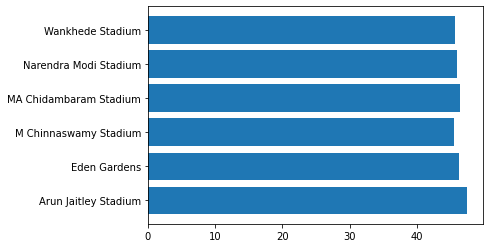

In [ ]:
#Venue

relevant_venues = ['Eden Gardens','M Chinnaswamy Stadium','MA Chidambaram Stadium','Narendra Modi Stadium',
                   'Arun Jaitley Stadium','Wankhede Stadium']

data_df_relevant_venues = data_df_processed[data_df_processed.venue.isin(relevant_venues)]
data_df_processed = data_df_relevant_venues.infer_objects() #converting the object data types to relevant data types

venue_avg = data_df_processed.groupby(['venue']).runs.mean()
plt.barh(venue_avg.index,venue_avg.values)


<BarContainer object of 4 artists>

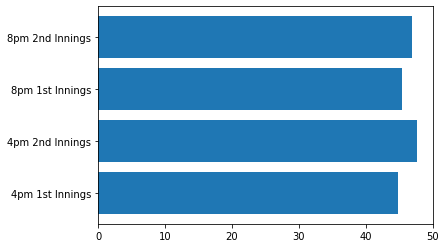

In [ ]:
#Afternoon vs Night Matches 

afternoon_matches_PP = data_df_processed[data_df_processed['D/N']==4]
night_matches_PP = data_df_processed[data_df_processed['D/N']==8]

noon1 = afternoon_matches_PP[afternoon_matches_PP.innings==1].runs.mean()
noon2 = afternoon_matches_PP[afternoon_matches_PP.innings==2].runs.mean()
night1 = night_matches_PP[night_matches_PP.innings==1].runs.mean()
night2 =night_matches_PP[night_matches_PP.innings==2].runs.mean()

labels = ['4pm 1st Innings','4pm 2nd Innings','8pm 1st Innings','8pm 2nd Innings']
plt.barh(labels,[noon1,noon2,night1,night2])

Text(0, 0.5, 'Powerplay Runs')

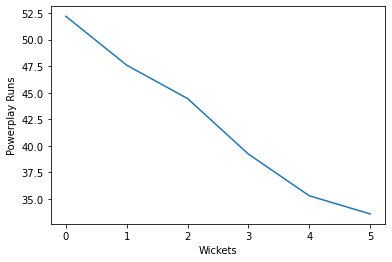

In [ ]:
#Wickets

wickets_avg = data_df_processed.groupby(['wickets']).runs.mean()
plt.plot(wickets_avg.index[:6],wickets_avg[:6]) #the 7th wicket score is an outlier
plt.xlabel('Wickets')
plt.ylabel('Powerplay Runs')

Text(0, 0.5, 'Powerplay Runs')

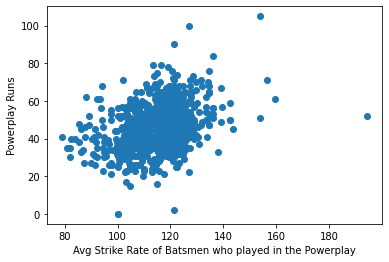

In [ ]:
#Avg Strike Rate

plt.scatter(data_df_processed.avg_strike_rate,data_df_processed.runs)
plt.xlabel('Avg Strike Rate of Batsmen who played in the Powerplay')
plt.ylabel('Powerplay Runs')

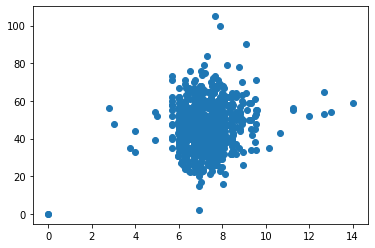

In [ ]:
plt.scatter(data_df_processed.bowler_1_ER,data_df_processed.runs)
#plt.scatter(data_df_processed.bowler_2_ER,data_df_processed.runs)
#plt.scatter(data_df_processed.bowler_3_ER,data_df_processed.runs)
#plt.scatter(data_df_processed.bowler_4_ER,data_df_processed.runs)

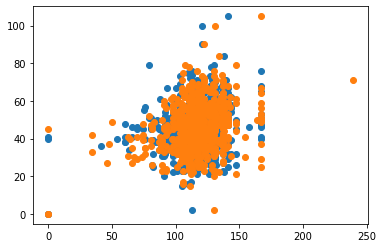

In [ ]:
plt.scatter(data_df_processed.batsman_1_SR,data_df_processed.runs)
plt.scatter(data_df_processed.batsman_2_SR,data_df_processed.runs)
#plt.scatter(data_df_processed.batsman_3_SR,data_df_processed.runs)
#plt.scatter(data_df_processed.batsman_4_SR,data_df_processed.runs)
#plt.scatter(data_df_processed.batsman_6_SR,data_df_processed.runs)
#plt.scatter(data_df_processed.batsman_7_SR,data_df_processed.runs)

Text(0, 0.5, 'Powerplay Runs')

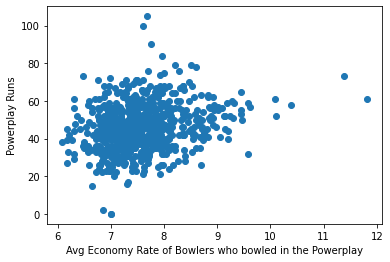

In [ ]:
#Avg Economy Rate

plt.scatter(data_df_processed.avg_economy_rate,data_df_processed.runs)
plt.xlabel('Avg Economy Rate of Bowlers who bowled in the Powerplay')
plt.ylabel('Powerplay Runs')

Text(0.5, 0, 'Runs Scored')

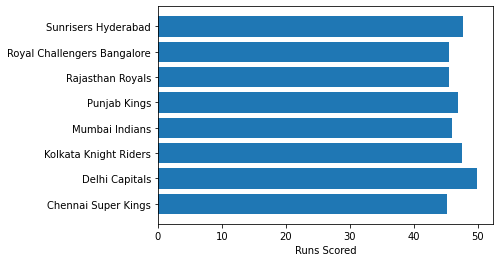

In [ ]:
#Batting Team

relevant_teams = ['Chennai Super Kings','Delhi Capitals','Kolkata Knight Riders','Mumbai Indians',
                  'Punjab Kings','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']

data_df_relevant_teams = data_df_processed[data_df_processed.batting_team.isin(relevant_teams)]
batting_team_avg = data_df_relevant_teams.groupby(['batting_team']).runs.mean()

labels = batting_team_avg.index
runs = batting_team_avg.values

plt.barh(labels,runs)
plt.xlabel('Runs Scored')

Text(0.5, 0, 'Runs Conceded')

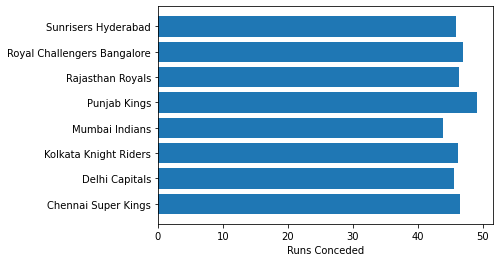

In [ ]:
#Bowling Team
 
data_df_bowling_teams = data_df_processed[data_df_processed.bowling_team.isin(relevant_teams)]
bowling_team_avg = data_df_bowling_teams.groupby(['bowling_team']).runs.mean()
 
labels = bowling_team_avg.index
runs = bowling_team_avg.values
 
plt.barh(labels,runs)
plt.xlabel('Runs Conceded')

# Preparing the Data for the Model

In [39]:
#data_df_processed = pd.read_csv('data_df_processed.csv')
selected_features = list(data_df_processed.columns[14:])+['wickets','D/N','innings']

In [40]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs,batsman_1_SR,batsman_2_SR,batsman_3_SR,batsman_4_SR,batsman_5_SR,batsman_6_SR,batsman_7_SR,batsman_8_SR,batsman_9_SR,batsman_10_SR,batsman_11_SR,bowler_1_ER,bowler_2_ER,bowler_3_ER,bowler_4_ER,bowler_5_ER,bowler_6_ER,venue_Arun Jaitley Stadium,venue_Eden Gardens,venue_M Chinnaswamy Stadium,venue_MA Chidambaram Stadium,venue_Narendra Modi Stadium,venue_Wankhede Stadium,bowl_Chennai Super Kings,bowl_Delhi Capitals,bowl_Kolkata Knight Riders,bowl_Mumbai Indians,bowl_Punjab Kings,bowl_Rajasthan Royals,bowl_Royal Challengers Bangalore,bowl_Sunrisers Hyderabad,bat_Chennai Super Kings,bat_Delhi Capitals,bat_Kolkata Knight Riders,bat_Mumbai Indians,bat_Punjab Kings,bat_Rajasthan Royals,bat_Royal Challengers Bangalore,bat_Sunrisers Hyderabad
0,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]",93.26,11.81,1,61,97.959999,121.830002,60.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.69,6.74,22.00,0.00,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,8.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar]",96.88,7.98,4,26,105.849998,81.050003,112.389999,101.169998,89.169998,91.669998,0.0,0.0,0.0,0.0,0.0,7.34,7.11,9.50,0.00,0.00,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,1,Chennai Super Kings,Punjab Kings,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]",115.25,7.64,1,53,116.809998,124.269997,104.680000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.91,7.67,8.33,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,4.0,2,Punjab Kings,Chennai Super Kings,"[K Goel, JR Hopes]","[JDP Oram, MS Gony]",108.70,9.14,1,63,96.389999,121.010002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9.50,8.78,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,335984,2007/08,Arun Jaitley Stadium,2008-04-19,8.0,1,Rajasthan Royals,Delhi Daredevils,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]",90.31,8.54,2,40,53.849998,141.020004,109.980003,56.410000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.70,12.50,7.43,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1254082,2021,Narendra Modi Stadium,2021-04-29,8.0,2,Delhi Capitals,Kolkata Knight Riders,"[PP Shaw, S Dhawan]","[Shivam Mavi, CV Varun, M Prasidh Krishna, SP ...",130.22,7.91,0,67,141.250000,119.190002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,8.21,8.40,8.79,6.39,7.78,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1682,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,1,Punjab Kings,Royal Challengers Bangalore,"[KL Rahul, P Simran Singh, CH Gayle]","[DR Sams, Mohammed Siraj, KA Jamieson]",125.39,7.73,1,49,125.860001,120.000000,130.320007,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.78,8.42,8.00,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1683,1254083,2021,Narendra Modi Stadium,2021-04-30,8.0,2,Royal Challengers Bangalore,Punjab Kings,"[V Kohli, D Padikkal, RM Patidar]","[RP Meredith, Mohammed Shami, Ravi Bishnoi]",106.36,8.65,1,36,112.389999,126.690002,80.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9.60,8.01,8.33,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1684,1254084,2021,Arun Jaitley Stadium,2021-05-01,8.0,1,Chennai Super Kings,Mumbai Indians,"[RD Gaikwad, MM Ali, F du Plessis]","[TA Boult, DS Kulkarni, JJ B

In [41]:
#label encoding the venue and teams
#RUN THIS BLOCK OF CODE ONLY ONCE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

data_df_final = data_df_processed.copy()
venue_encoder = LabelEncoder()
team_encoder = LabelEncoder()

data_df_final['venue'] = venue_encoder.fit_transform(data_df_final.venue)

team = team_encoder.fit(data_df_final.batting_team)
data_df_final['batting_team'] = team.transform(data_df_final.batting_team)
data_df_final['bowling_team'] = team.transform(data_df_final.bowling_team)

data_df_final.head()

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs,batsman_1_SR,batsman_2_SR,batsman_3_SR,batsman_4_SR,batsman_5_SR,batsman_6_SR,batsman_7_SR,batsman_8_SR,batsman_9_SR,batsman_10_SR,batsman_11_SR,bowler_1_ER,bowler_2_ER,bowler_3_ER,bowler_4_ER,bowler_5_ER,bowler_6_ER,venue_Arun Jaitley Stadium,venue_Eden Gardens,venue_M Chinnaswamy Stadium,venue_MA Chidambaram Stadium,venue_Narendra Modi Stadium,venue_Wankhede Stadium,bowl_Chennai Super Kings,bowl_Delhi Capitals,bowl_Kolkata Knight Riders,bowl_Mumbai Indians,bowl_Punjab Kings,bowl_Rajasthan Royals,bowl_Royal Challengers Bangalore,bowl_Sunrisers Hyderabad,bat_Chennai Super Kings,bat_Delhi Capitals,bat_Kolkata Knight Riders,bat_Mumbai Indians,bat_Punjab Kings,bat_Rajasthan Royals,bat_Royal Challengers Bangalore,bat_Sunrisers Hyderabad
0,335982,2007/08,14,2008-04-18,8.0,1,6,12,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]",93.26,11.81,1,61,97.959999,121.830002,60.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.69,6.74,22.00,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,335982,2007/08,14,2008-04-18,8.0,2,12,6,"[R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...","[AB Dinda, I Sharma, AB Agarkar]",96.88,7.98,4,26,105.849998,81.050003,112.389999,101.169998,89.169998,91.669998,0.0,0.0,0.0,0.0,0.0,7.34,7.11,9.50,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,335983,2007/08,22,2008-04-19,4.0,1,0,9,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]",115.25,7.64,1,53,116.809998,124.269997,104.680000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.91,7.67,8.33,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,335983,2007/08,22,2008-04-19,4.0,2,9,0,"[K Goel, JR Hopes]","[JDP Oram, MS Gony]",108.70,9.14,1,63,96.389999,121.010002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9.50,8.78,0.00,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,335984,2007/08,0,2008-04-19,8.0,1,10,3,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]",90.31,8.54,2,40,53.849998,141.020004,109.980003,56.410000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.70,12.50,7.43,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
#chosen_features = ['batsman_{}_SR'.format(i) for i in range(1,11)]+['bowler_{}_ER'.format(i) for i in range(1,7)]+['wickets','venue','batting_team','bowling_team']

#converting the dataframe into a numpy array
X = data_df_processed[selected_features].values
y = data_df_processed.runs.values

#making the data type compatible for model training
X=X.astype(np.float32)
y=y.astype(np.float32)

print(X.shape)
print(y.shape)

(1686, 42)
(1686,)


In [43]:
#scaling the data
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Training

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [46]:
#Accuracy metric functions

def custom_accuracy_metric(y_true,y_pred,threshhold = 3):
    true_mat = y_pred[np.abs(y_true-y_pred)<=threshhold]
    return len(true_mat)/len(y_pred)

def analyse_model(model,X_train,X_test,y_train,y_test,threshhold=3):
    
    y_pred_train = np.array(list(map(int,model.predict(X_train))))
    y_pred_test = np.array(list(map(int,model.predict(X_test))))
    
    print('R2 Score for training set:',round(r2_score(y_train,y_pred_train),3))
    print('R2 Score for test set:',round(r2_score(y_test,y_pred_test),3))
    print()
    
    #using custom accuracy metric
    print('Accuracy for a threshhold of {} runs'.format(threshhold))
    print('Training set: ',round(custom_accuracy_metric(y_train,y_pred_train,threshhold)*100,2),'%')
    print('Test set: ',round(custom_accuracy_metric(y_test,y_pred_test,threshhold)*100,2),'%')

Linear Regression Model

In [47]:
#lr stands for linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

print('**** Linear Regression ****')
analyse_model(lr,X_train,X_test,y_train,y_test,3)

**** Linear Regression ****
R2 Score for training set: 0.321
R2 Score for test set: 0.328

Accuracy for a threshhold of 3 runs
Training set:  30.46 %
Test set:  31.04 %


Decision Tree Regressor Model

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

print('**** Decision Tree Regressor ****')
analyse_model(tree,X_train,X_test,y_train,y_test,5)

**** Decision Tree Regressor ****
R2 Score for training set: 1.0
R2 Score for test set: -0.369

Accuracy for a threshhold of 5 runs
Training set:  100.0 %
Test set:  31.67 %


Bayesian Ridge Regression Model

In [48]:
br = BayesianRidge()
br.fit(X_train,y_train)

print('**** Bayesian Ridge ****')
analyse_model(br,X_train,X_test,y_train,y_test,3)

**** Bayesian Ridge ****
R2 Score for training set: 0.311
R2 Score for test set: 0.329

Accuracy for a threshhold of 3 runs
Training set:  29.43 %
Test set:  28.44 %


# Neural Network Model

In [49]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [52]:
DL_model = keras.Sequential()

DL_model.add(Dense(64,input_dim=42, activation= "relu"))
DL_model.add(Dense(128, activation= "relu"))
DL_model.add(Dense(256, activation= "relu"))
DL_model.add(Dense(128, activation= "relu"))
DL_model.add(Dense(64, activation= "relu"))
DL_model.add(Dense(32, activation= "relu"))
DL_model.add(Dense(16, activation= "relu"))

DL_model.add(Dense(1,activation = 'linear'))

DL_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)               

In [53]:
DL_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

DL_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 512.3727 - mean_squared_error: 512.3727
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 118.1090 - mean_squared_error: 118.1090
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 113.6643 - mean_squared_error: 113.6643
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 113.1414 - mean_squared_error: 113.1414
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 109.4794 - mean_squared_error: 109.4794
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 129.8681 - mean_squared_error: 129.8681
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 105.9785 - mean_squared_error: 105.9785
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 110.3328 - mean_squared_error: 110.3328
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 110.2516 - mean_squared

In [54]:
print('**** Neural Network with 1 hidden layer ****')
analyse_model(DL_model,X_train,X_test,y_train,y_test,threshhold=3)

**** Neural Network with 1 hidden layer ****
R2 Score for training set: 0.459
R2 Score for test set: 0.299

Accuracy for a threshhold of 3 runs
Training set:  33.54 %
Test set:  28.91 %


In [55]:
def print_test_and_pred(y_true,y_pred):
  print('Y_true Y_pred')
  for i in range(len(y_true)):
    print(int(y_true[i]),y_pred[i])

In [57]:
y_pred_test = np.array(list(map(int,DL_model.predict(X_test))))
y_pred_train = np.array(list(map(int,DL_model.predict(X_train))))

In [56]:
print_test_and_pred(y_train,y_pred_train)

NameError: ignored

In [ ]:
print(np.array(list(map(int,y_test))))

[ 48  44  46  65  57  51  34  41  30  50  76  68  50  28  54  62  49  39
  73  48  49  33  46  44  52  38  42  46  61  26  50  48  64  45  42  46
  47  46  26  46  40  44  37  30  45  49  69  43  57  29  55  53  46  33
  47  50  55  39  59  37  59  46  62  32  51  33  26  51  61  59  43  29
  60  41  27  25  47  44  59  17  47  66  43  46  27  44  68  58  70  49
  39  26  55  45  40  31  51  53  52  39  61  41  36  31  54  66  40  58
  72  45  30  54  61  50  31  46  60  63  51  40  46  48  47  57  38  41
  49  23  36  34  29  76  60  49  56  40  39  51  27  57  22  57  59  52
  42  58  41  54  68  31  33  49  27  59  36  47  70  68  57  34  46  32
  51  29  48  72  38  48  50  51  47  59  38 105  69  30  31  46  35  25
  39  43  39  22  60  46  48  48  60  37  32  67  48  61  37  14  37  58
  58  36  36  47  60  41  47  30  64  29  38  32  64  31  45  44  60  65
  31  60  17  43  44  55  52  40  44  39  43  41  41  41  56  56  39  39
  32  44  34  62  73  29  43  24  50  26  50  34  3

# Saving the Models

In [ ]:
import joblib

In [ ]:
joblib.dump(venue_encoder,'venue_encoder.joblib')
joblib.dump(team_encoder,'team_encoder.joblib')
joblib.dump(scaler,'scaler.joblib')
#DL_model.save('DL_model.h5')
joblib.dump(lr,'linear_regression.joblib')

In [ ]:
joblib.dump(br,'bayesian_ridge_regression.joblib')